### STUDENT PERFORMANCE INDICATOR

Life cycle of the project
1) Understanding the problem statement
2) Data collection
3) Data checks to perform
4) EDA
5) Data pre-processing 
6) Model training 
7) Choosing the best model

1) PROBLEM STATEMENT 

This project defines how a student's performance is affected by factors sucj as gender, ethinicity , parental education , lunch and mane more parameters

2. Data Collection 

The dataset has been collected from : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The dataset consists of 8 columns and 1000 rows

2.1 Importing the necessary packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Reading the CSV file
df=pd.read_csv("/Users/ayushsaini/Desktop/first/notebook/stud.csv")

In [8]:
# Displaying first few rows of the dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
# Returning the shape of the data 
df.shape

(1000, 8)

2.2 Data Checks to perform 
* Check for missing values 
* Check for duplicates 
* Check datatype
* Check unique values in each columm
* Check statistics of dataset
* Check various categories present in different columns 

In [15]:
# Checking for missing values:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no  missing values

In [16]:
# Checking for duplicated values :
df.duplicated().sum()

0

There are no duplicates

In [17]:
# Checking datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [38]:
# Displaying the numeric and categorical features 
numericals_cols=[features for features in df.columns if df[features].dtype!="object"]
categorical_cols=[features for features in df.columns if df[features].dtype=="object"]
print(f"The number of numeric features are {len(numericals_cols)} which are {numericals_cols}")
print(f"The number of numeric features are {len(categorical_cols)} which are {categorical_cols}")

The number of numeric features are 3 which are ['math_score', 'reading_score', 'writing_score']
The number of numeric features are 5 which are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [30]:
# Checking the number of unique values in each column
col=df.columns
for i in range(len(col)):
    print(f" The number of unique values in {col[i]} is {df[col[i]].nunique()}")

 The number of unique values in gender is 2
 The number of unique values in race_ethnicity is 5
 The number of unique values in parental_level_of_education is 6
 The number of unique values in lunch is 2
 The number of unique values in test_preparation_course is 2
 The number of unique values in math_score is 81
 The number of unique values in reading_score is 72
 The number of unique values in writing_score is 77


In [36]:
# Displaying the unique values in categorical features.
categorical_cols=[features for features in df.columns if df[features].dtype=="object"]
for i in range(len(categorical_cols)):
    print(f" The unique value in {categorical_cols[i]} are : {df[categorical_cols[i]].unique()}")

 The unique value in gender are : ['female' 'male']
 The unique value in race_ethnicity are : ['group B' 'group C' 'group A' 'group D' 'group E']
 The unique value in parental_level_of_education are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 The unique value in lunch are : ['standard' 'free/reduced']
 The unique value in test_preparation_course are : ['none' 'completed']


In [26]:
# Checking the statistics of the data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Now, we perform feature selection on the three score ("maths_score","reading_score","writing score") by creating two additional columns ("total" , "average"). At the end, these two features would be the dependent variables and the rest features would be the independent variables

In [39]:
# Adding the two new columns "total_score" and "average"
df["total_score"]=df["reading_score"]+df["writing_score"]+df["math_score"]
df["average"]=df["total_score"]/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [42]:
reading_full=df[df["reading_score"]==100]["total_score"].count()
maths_full=df[df["math_score"]==100]["total_score"].count()
writing_full=df[df["writing_score"]==100]["total_score"].count()
print(f"The number of students that scored full in Maths are {maths_full}")
print(f"The number of students that scored full in Writing are {writing_full}")
print(f"The number of students that scored full in Reading are {reading_full}")

The number of students that scored full in Maths are 7
The number of students that scored full in Writing are 14
The number of students that scored full in Reading are 17


In [43]:
reading_less_= df[df["reading_score"]<20]["total_score"].count()
maths_less_= df[df["math_score"]<20]["total_score"].count()
writing_less_= df[df["writing_score"]<20]["total_score"].count()
print(f"The number of students that scored less than 20 in Maths are {maths_less_}")
print(f"The number of students that scored less than 20 in Writing are {writing_less_}")
print(f"The number of students that scored less than 20 in Reading are {reading_less_}")

The number of students that scored less than 20 in Maths are 4
The number of students that scored less than 20 in Writing are 3
The number of students that scored less than 20 in Reading are 1


The worst performance of students is in maths .
The best performance of students is in reading section.

3. Data Visulaisation

<Axes: xlabel='average', ylabel='Count'>

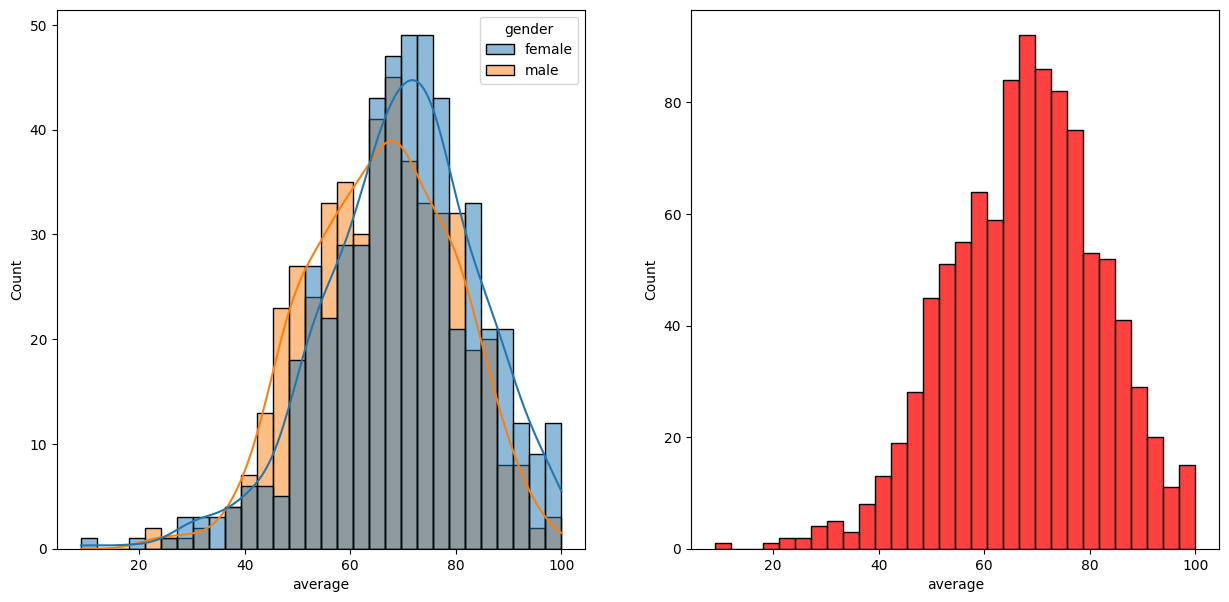

In [76]:
# Affect on average score based upon gender
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",hue="gender",kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=df,x="average",bins=30,color="red")

<Axes: xlabel='total_score', ylabel='Count'>

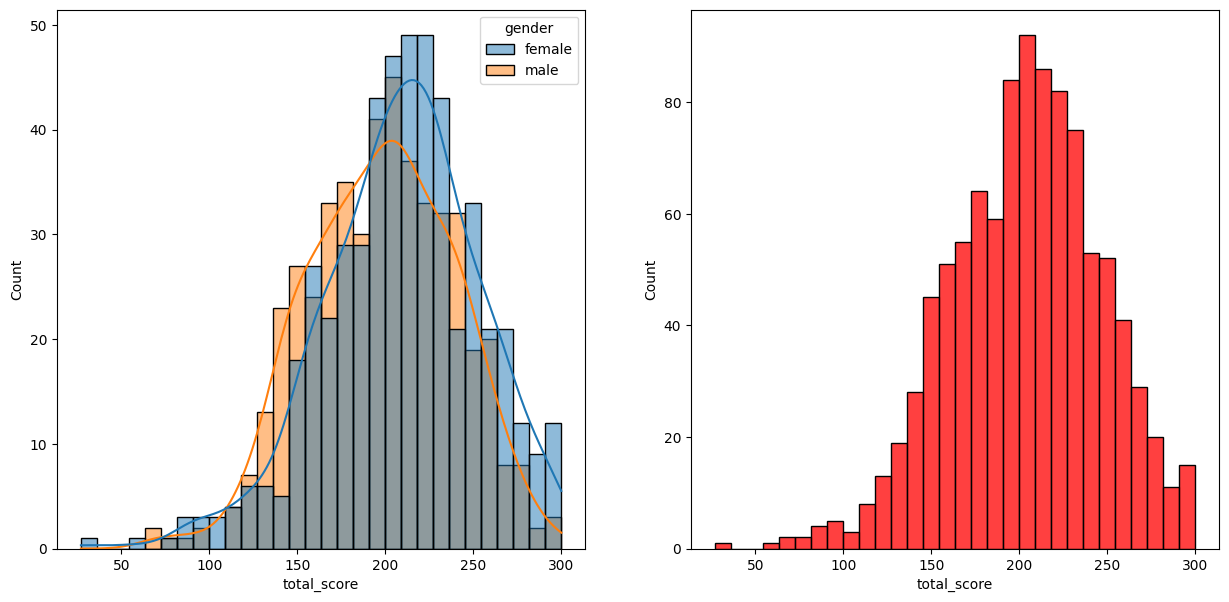

In [77]:
# Affect on total score based upon gender
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="total_score",hue="gender",kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=df,x="total_score",bins=30,color="red")

As seen from the above two graphs we can observe that female students tend to perform better than male students

<Axes: xlabel='average', ylabel='Count'>

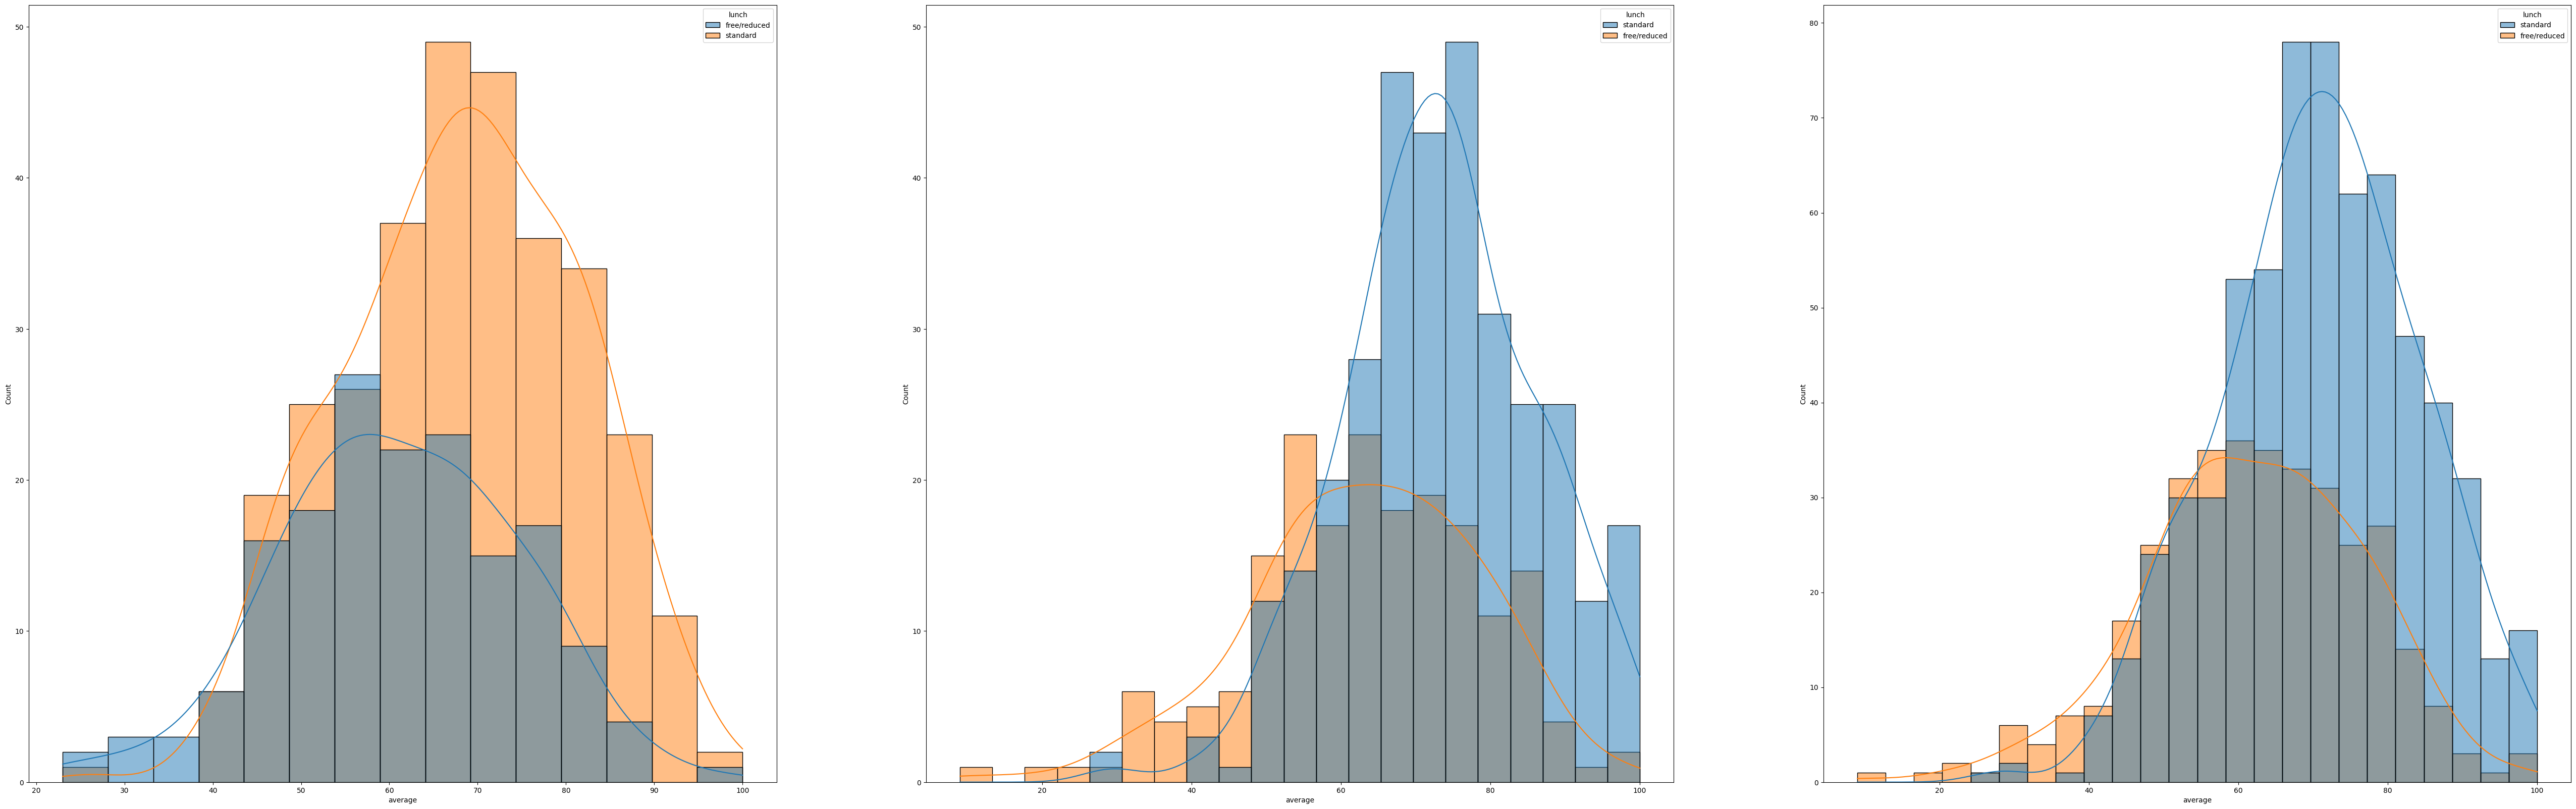

In [80]:
# Affect on average score based upon the type of lunch consumed by both genders
fig,axs=plt.subplots(1,3,figsize=(65,20))
plt.subplot(1,3,1)
sns.histplot(data=df[df["gender"]=="male"],x="average",hue="lunch",kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=='female'],x="average",hue="lunch",kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df,x="average",kde=True,hue="lunch")

Standard lunches perform better irrepstive of gender

<Axes: xlabel='average', ylabel='Count'>

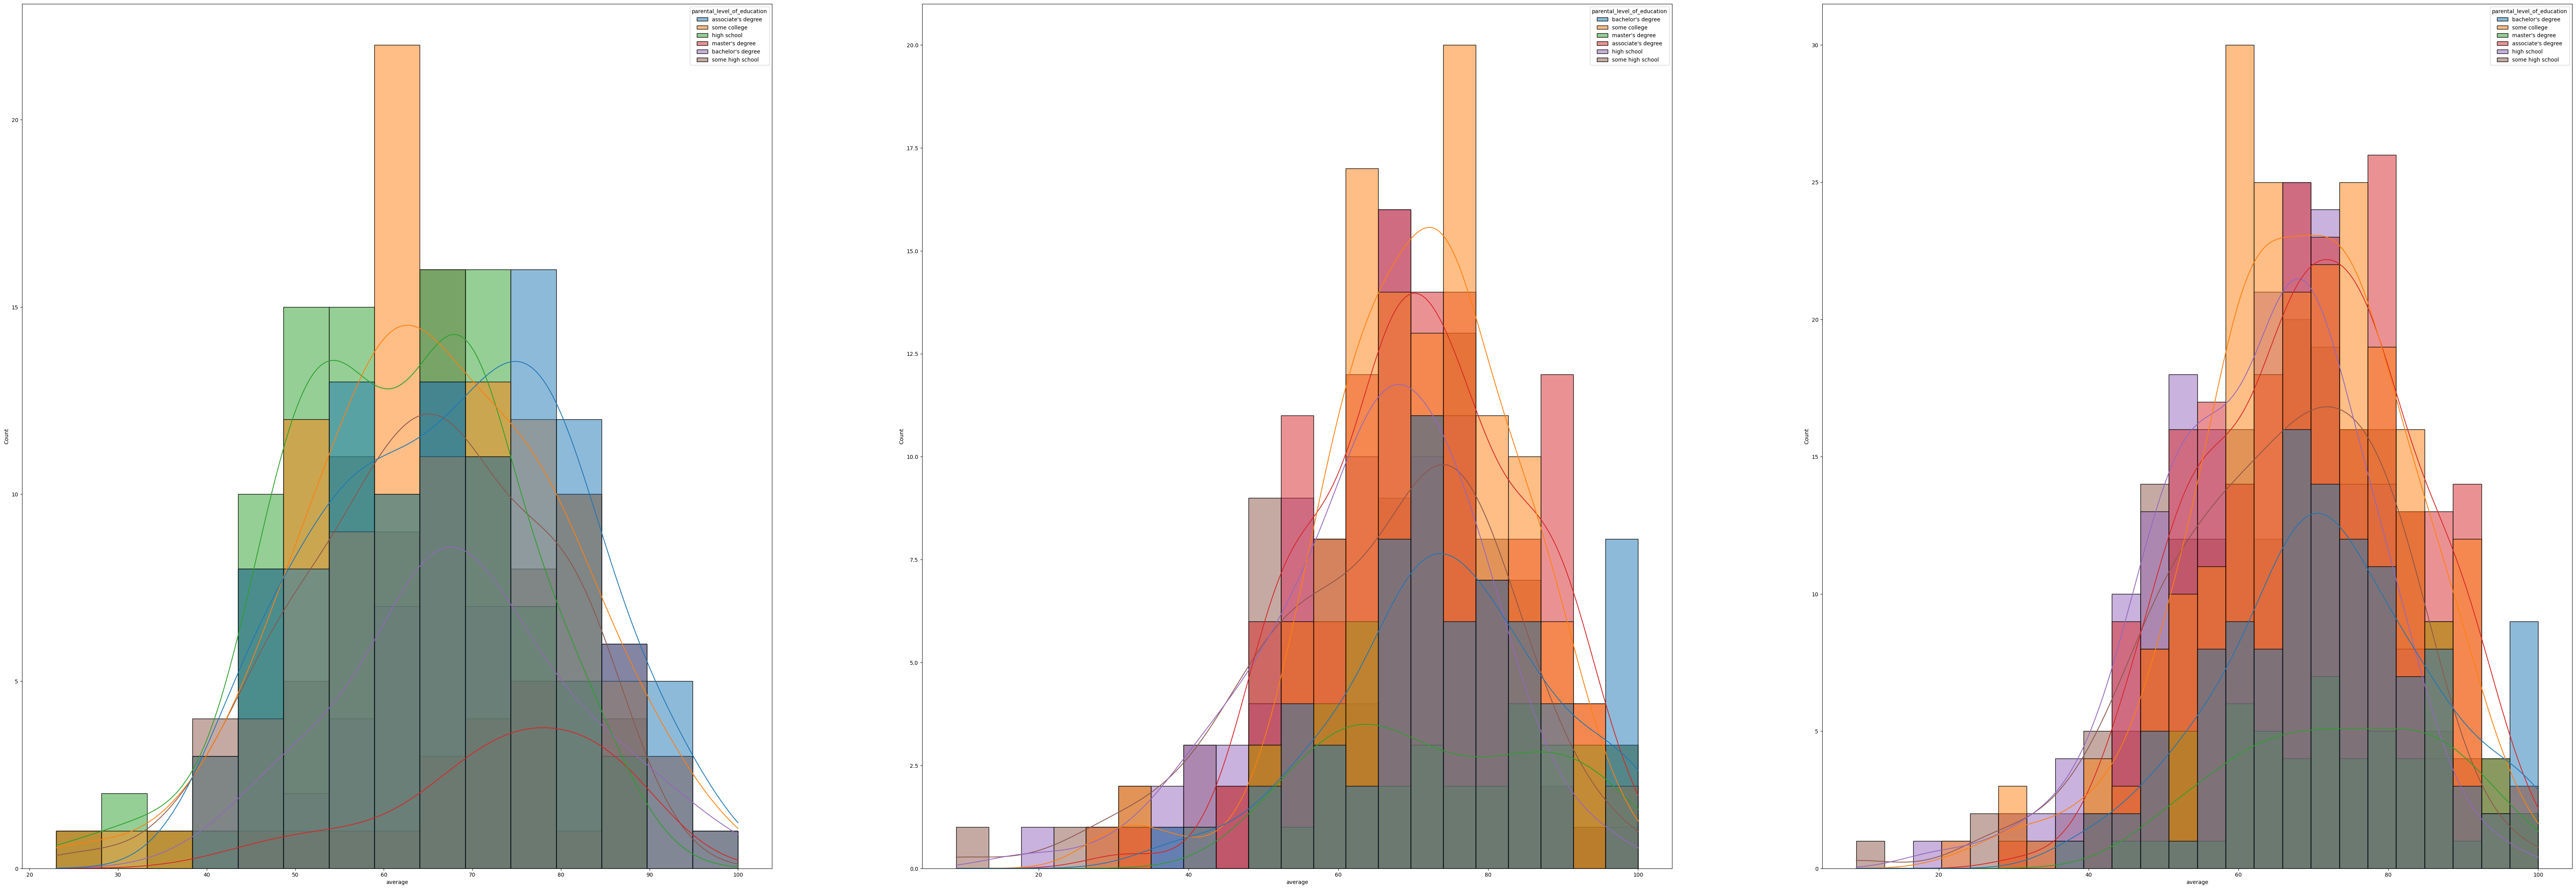

In [84]:
# Affect on average school based upon the type of education level attained by parents of both genders
fig,axs=plt.subplots(1,3,figsize=(85,29))
plt.subplot(1,3,1)
sns.histplot(data=df[df["gender"]=="male"],x="average",hue="parental_level_of_education",kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=='female'],x="average",hue="parental_level_of_education",kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df,x="average",kde=True,hue="parental_level_of_education",color="red")

* In male students , performance is slightly affectd if parents' education level is associate' or masters degree
* In female students , performance is unbiased irrespective of parent's education level 
* From last plot , we can see the average score of student is not affected by parent's education level

<Axes: xlabel='average', ylabel='Count'>

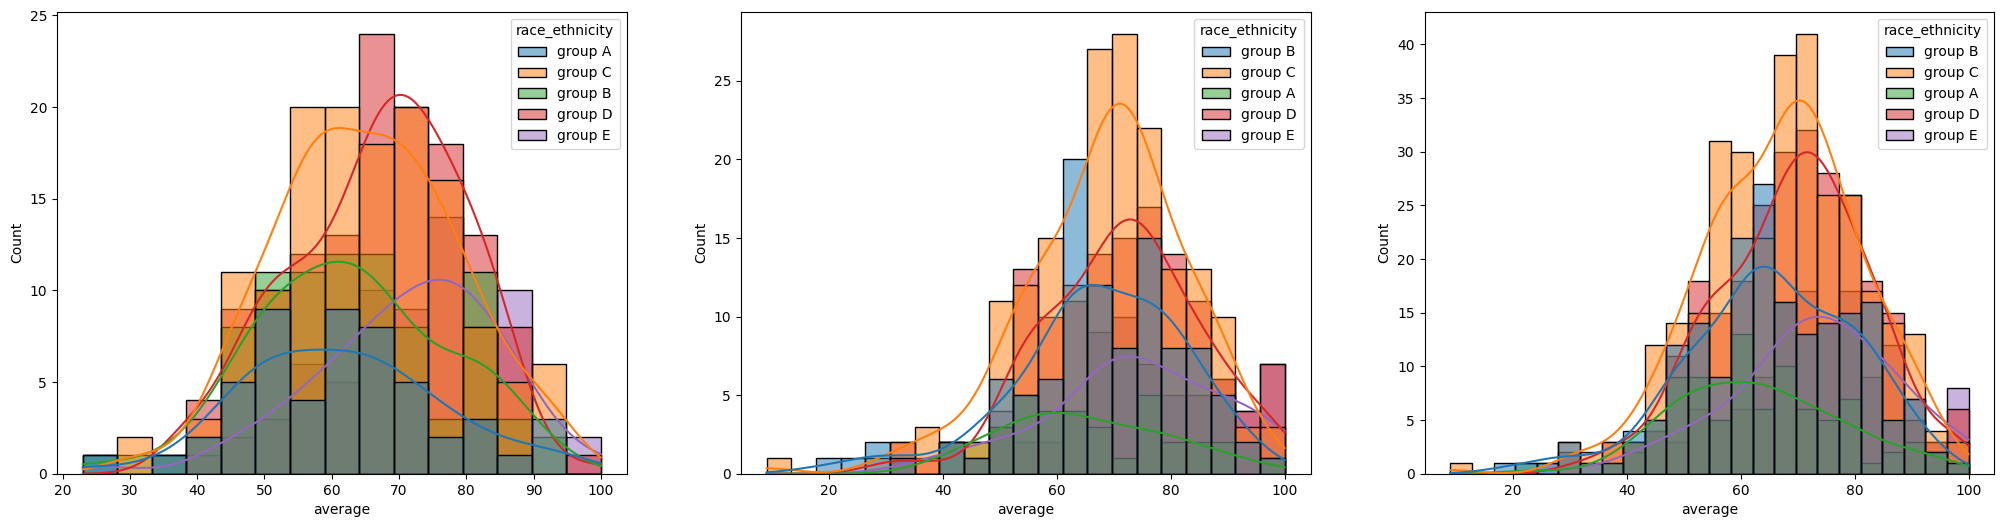

In [88]:
# Affect on average school based upon the type of ethinicity of both genders
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df[df["gender"]=="male"],x="average",hue="race_ethnicity",kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=='female'],x="average",hue="race_ethnicity",kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df,x="average",kde=True,hue="race_ethnicity",color="red")

* Group A and B perform poor irrespective of the gender 
* The no of Group E male students performing better is greater than the female ones 